### ``Benchmarks results``

#### ``Size of compressed files``

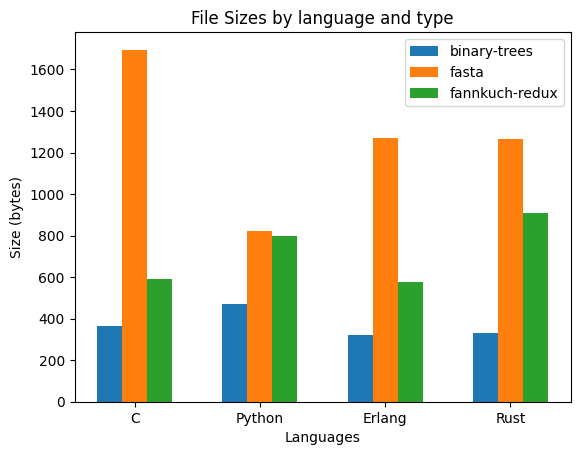

In [11]:
import matplotlib.pyplot as plt

data = {
    'C': {'binary-trees': 363, 'fasta': 1695, 'fannkuch-redux': 591},
    'Python': {'binary-trees': 472, 'fasta': 823, 'fannkuch-redux': 797},
    'Erlang': {'binary-trees': 320, 'fasta': 1268, 'fannkuch-redux': 576},
    'Rust': {'binary-trees': 332, 'fasta': 1265, 'fannkuch-redux': 907}
}

# Extracting data
languages = list(data.keys())
file_types = list(data['C'].keys())
sizes = {file_type: [data[language][file_type] for language in languages] for file_type in file_types}

# Plotting
bar_width = 0.2
index = range(len(languages))

for i, (file_type, size) in enumerate(sizes.items()):
    plt.bar([x + i * bar_width for x in index], size, bar_width, label=file_type)

plt.xlabel('Languages')
plt.ylabel('Size (bytes)')
plt.title('File Sizes by language and type')
plt.xticks([x + bar_width for x in index], languages)
plt.legend()
plt.show()


#### ``Time, CPU time and memory usage``

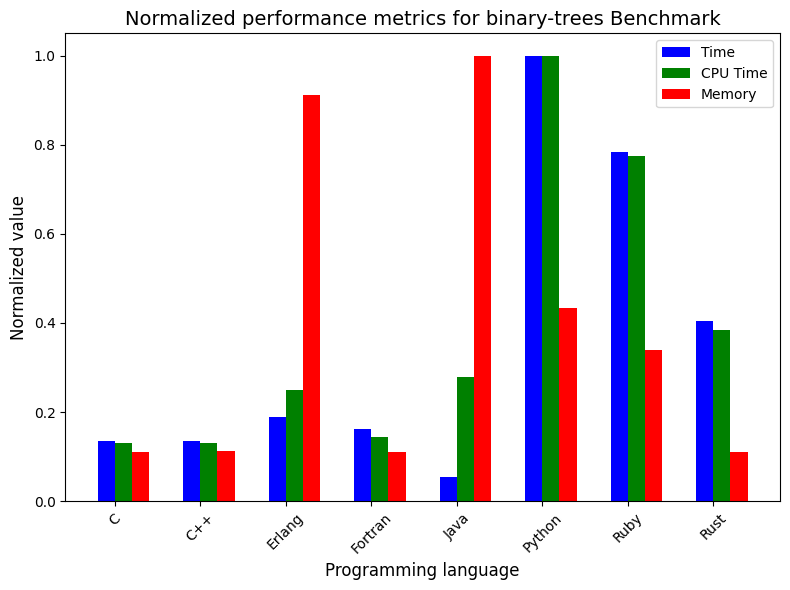

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

csv_files = [
    '../results/binary-trees_compilation_stats-c.csv',
    '../results/fannkuch-redux_compilation_stats-c.csv',
]

for csv_file in csv_files:
    data = pd.read_csv(csv_file)
    data = data[data['Real Time(s)'] != ' Compilation Failed']

    data['Real Time(s)'] = pd.to_numeric(data['Real Time(s)'], errors='coerce')
    data['User Time(s)'] = pd.to_numeric(data['User Time(s)'], errors='coerce')
    data['System Time(s)'] = pd.to_numeric(data['System Time(s)'], errors='coerce')
    data['Binary Size(bytes)'] = pd.to_numeric(data['Binary Size(bytes)'], errors='coerce')

    averages = data.groupby('Optimization').mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))  

for i, metric in enumerate(metrics):
    values = [normalized_data[lang][metric] for lang in languages]
    ax.bar(index + i * bar_width, values, bar_width, label=metric, color=colors[i])

ax.set_xlabel('Programming language', fontsize=12) 
ax.set_ylabel('Normalized value', fontsize=12) 
ax.set_title('Normalized performance metrics for binary-trees Benchmark', fontsize=14) 
ax.set_xticks(index + bar_width / 2) 
ax.set_xticklabels(languages, fontsize=10) 
ax.legend(fontsize=10) 

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ``Compilation Options for C``
- **`-O0`** : the default level, which allows for faster compilation and facilitates debugging.
- **`-O1`** : enables basic optimizations aimed at reducing execution time and required space.
- **`-O2`** : a higher level of optimization than `-O1`, focusing on optimizing code performance.
- **`-O3`** : optimizes the size of the generated code and maximizes program speed.
- **`-Os`** : optimizes the code for size. It enables all `-O2` optimizations that do not increase the size of the code.

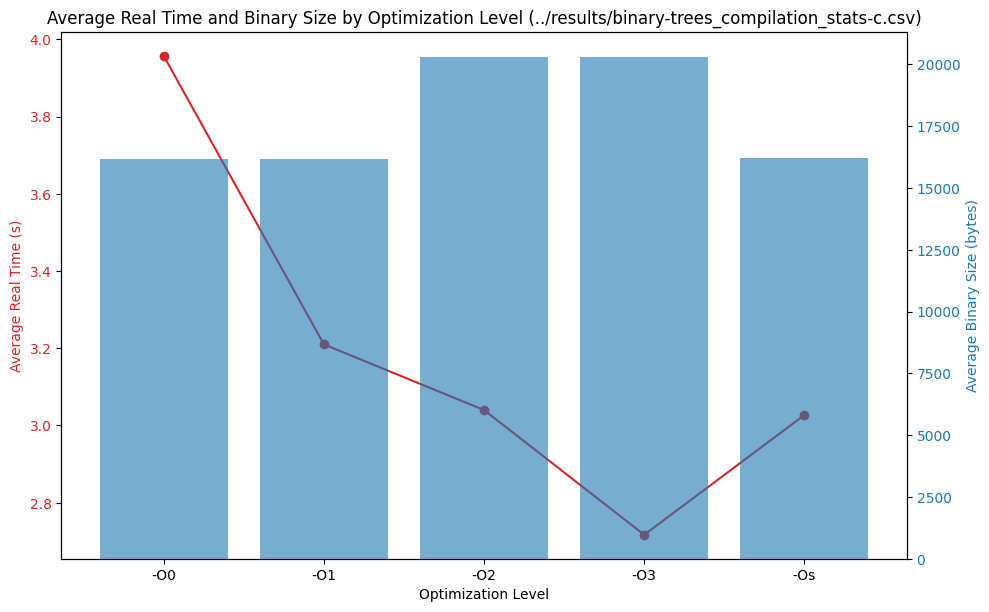

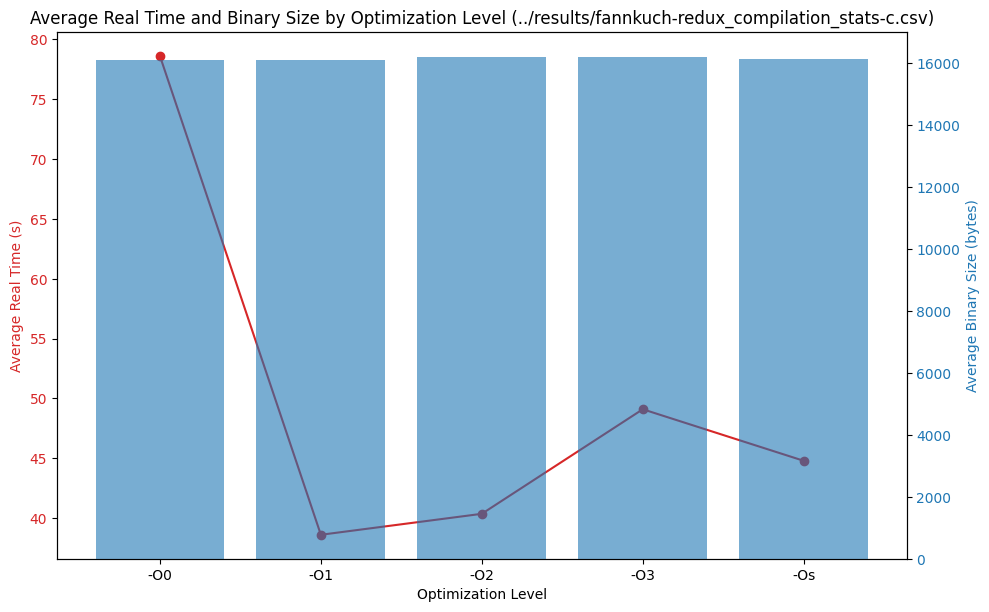

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

csv_files = [
    '../results/binary-trees_compilation_stats-c.csv',
    '../results/fannkuch-redux_compilation_stats-c.csv',
]

for csv_file in csv_files:
    data = pd.read_csv(csv_file)
    data = data[data['Real Time(s)'] != ' Compilation Failed']

    data['Real Time(s)'] = pd.to_numeric(data['Real Time(s)'], errors='coerce')
    data['User Time(s)'] = pd.to_numeric(data['User Time(s)'], errors='coerce')
    data['System Time(s)'] = pd.to_numeric(data['System Time(s)'], errors='coerce')
    data['Binary Size(bytes)'] = pd.to_numeric(data['Binary Size(bytes)'], errors='coerce')

    averages = data.groupby('Optimization').mean().reset_index()

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:red'
    ax1.set_xlabel('Optimization Level')
    ax1.set_ylabel('Average Real Time (s)', color=color)
    ax1.plot(averages['Optimization'], averages['Real Time(s)'], color=color, marker='o', label='Average Real Time')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('Average Binary Size (bytes)', color=color)
    ax2.bar(averages['Optimization'], averages['Binary Size(bytes)'], color=color, alpha=0.6, label='Average Binary Size')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(f'Average Real Time and Binary Size by Optimization Level ({csv_file})')
    plt.show()

### ``Calculus (floating operations)``

* The provided results from benchmarks in C, Python, and Rust for both float (32-bit) and double (64-bit) operations providing insight into the performance characteristics and efficiency of floating-point computations across these languages. 

* The results for both float and double operations are consistent, with minor variations in the least significant digits. This consistency is expected due to the use of **IEEE 754** standards for floating-point arithmetic in modern computing environments.

``Analysis``

* ``C`` shows the fastest execution times for both float and double operations among the three languages. This performance is expected as C is a lower-level language that provides close to hardware execution efficiency.
The times for float and double operations are very close, with double operations being slightly faster in multiplication but slower in addition and division.

* ``Python`` shows significantly longer execution times compared to C and Rust. This is because Python is a higher-level, interpreted language with additional overhead for type checking and dynamic dispatch that can slow down execution, especially in computationally intensive tasks.

* ``Rust`` execution times are closer to those of ``C``, reflecting its efficiency and performance optimization capabilities.

``Perfomance/Results differences``

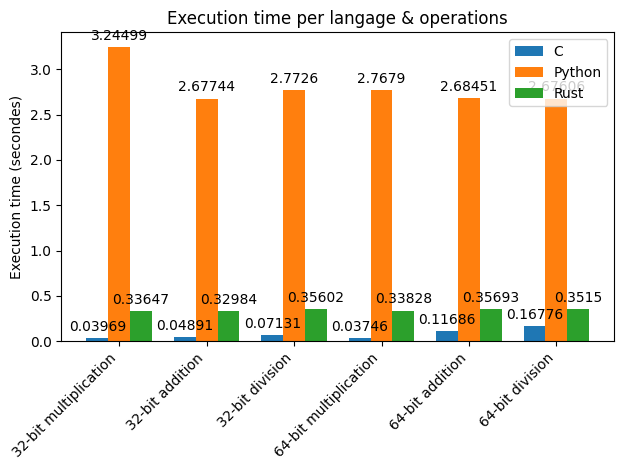

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Données
operations = ['32-bit multiplication', '32-bit addition', '32-bit division', '64-bit multiplication', '64-bit addition', '64-bit division']
times_c = [0.039686, 0.048914, 0.071309, 0.037459, 0.116861, 0.167760]
times_python = [3.244994, 2.677444, 2.772597, 2.767900, 2.684509, 2.676056]
times_rust = [0.336470, 0.329845, 0.356023, 0.338277, 0.356930, 0.351496]

x = np.arange(len(operations))  # Les positions des labels sur l'axe x
width = 0.25  # La largeur des barres

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, times_c, width, label='C')
rects2 = ax.bar(x, times_python, width, label='Python')
rects3 = ax.bar(x + width, times_rust, width, label='Rust')

# Ajout de textes pour les labels, titre et légende personnalisée
ax.set_ylabel('Execution time (secondes)')
ax.set_title('Execution time per langage & operations')
ax.set_xticks(x)
ax.set_xticklabels(operations, rotation=45, ha="right")
ax.legend()

# Fonction pour afficher les valeurs au-dessus des barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 5)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points de décalage vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()